In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'Data/実験2.txt'

In [3]:
columns = ["nSeq", "I1", "I2", "O1", "O2", "A1", "A2", "A3", "A4", "A5", "A6"]
sampling_rate = 1000

df = None
reader = pd.read_csv(path, sep='\t', header=None, names=columns, index_col=False, chunksize=600*sampling_rate)
for r in reader:
    if df is None:
        #  頭から3行目は要らない
        df = r.drop([i for i in range(3)])
    else:
        df = df.append(r, ignore_index=True)
        
df = df.reset_index(drop=True)

print(df.shape)
df.head()

/Users/kessapassa/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(713250, 11)


,nSeq,I1,I2,O1,O2,A1,A2,A3,A4,A5,A6
0,0,0.0,0.0,0.0,0.0,507.0,495.0,100.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,508.0,495.0,99.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,510.0,495.0,99.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0,509.0,496.0,99.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0,508.0,496.0,99.0,0.0,0.0,0.0


In [36]:
target='A2'
start_time = int(sampling_rate * 60 * 6.9)
df_target = df[target][start_time:start_time+30000]
# df_target = df[target]

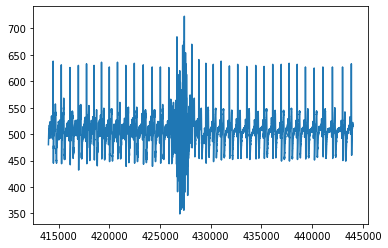

In [37]:
plt.plot(df_target)

In [5]:
wave = np.array(df_target / df_target.mean())
time = np.arange(0, df_target.shape[0], 1)

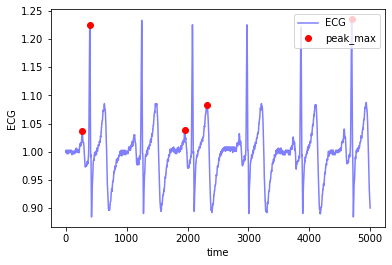

In [6]:
from scipy import signal

#ピーク検出
maxid = signal.argrelmax(wave, order=100)

#波形の表示
def peak_detect(x,y,lab,ID):
    plt.plot(x, y, label=lab, c="blue", alpha=0.5)
    plt.plot(x[ID], y[ID], "ro", label="peak_max")
    plt.xlabel("time")
    plt.ylabel("ECG")
    plt.legend(loc="upper right")

peak_detect(time,wave,"ECG",maxid)

# ダウンサンプリング
https://qiita.com/sumita_v09/items/808a3f8506065639cf51

# Biosppy
https://pypi.org/project/biosppy/

/Users/kessapassa/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


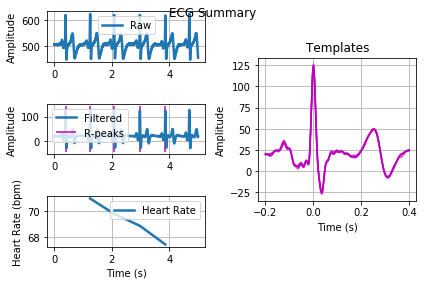

In [7]:
from biosppy import storage
from biosppy.signals import ecg

out = ecg.ecg(signal=df_target.values, sampling_rate=1000., show=True)

In [8]:
out.keys()

['ts',
 'filtered',
 'rpeaks',
 'templates_ts',
 'templates',
 'heart_rate_ts',
 'heart_rate']

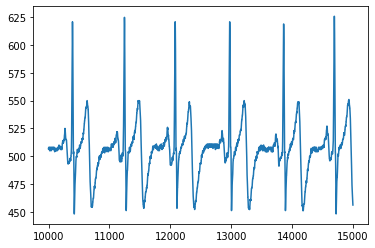

In [9]:
plt.plot(df_target)

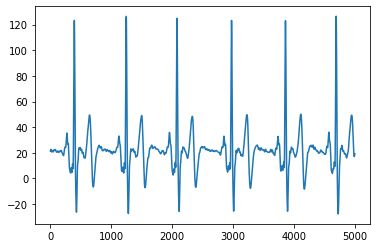

In [10]:
plt.plot(out['filtered'])

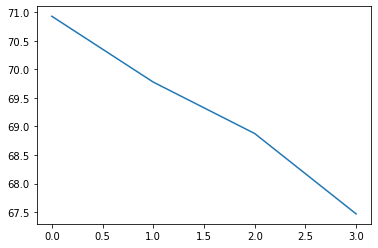

In [11]:
plt.plot(out['heart_rate'])

In [12]:
out['rpeaks']

array([ 393, 1245, 2079, 2975, 3861])